# Working with Histograms

# Datasets

In [27]:
from circllhist import Circllhist
import numpy as np
import json, csv

REQUEST_RATES = np.loadtxt("../../datasets/request_rate_cluster:6h@5M.csv", delimiter=",", skiprows=1)

d = []
with open("../../datasets/api_latency_histogram:1W@60sec.csv","r") as fh:
    i = 0
    for rec in csv.reader(fh):
        i += 1
        if not len(rec) == 2: print(i, rec)
        d.append([rec[0], Circllhist.from_dict(json.loads(rec[1] or "{}"))])
        
API_LATENCY = d

H = Circllhist()
for t,h in API_LATENCY:
    H.merge(h)
API_TOTAL = H

# Exercises

1. Use `plt.hist` from the matplotlib library, to create histograms for the REQUEST_RATES dataset, loaded below.

2. Add vertical lines for p25, p50, p75 in a different color.

3. Add rugs for the the (Tukey) outliers of each dataset

# Introductionto Libcircllhist

https://github.com/circonus-labs/libcircllhist/

In [28]:
H = Circllhist()
H.insert(0.00002)
H.insert(0.2)
H.insert(20)
print(H.mean())
print(H.count())

6.9016735
3


In [29]:
for bin, count in H:
    print(bin,"->", count)

+20e-006 -> 1
+20e-002 -> 1
+20e+000 -> 1


In [30]:
print("Available Histogram Methods:\n============================")
for m in dir(Circllhist):
    if not m.startswith("_"):
        print("* ", m)

Available Histogram Methods:
*  bin_count
*  clear
*  compress_mbe
*  count
*  count_above
*  count_below
*  count_nearby
*  from_b64
*  from_dict
*  insert
*  insert_intscale
*  mean
*  merge
*  moment
*  plot
*  quantile
*  stddev
*  sum
*  to_b64
*  to_dict


(0, 300)

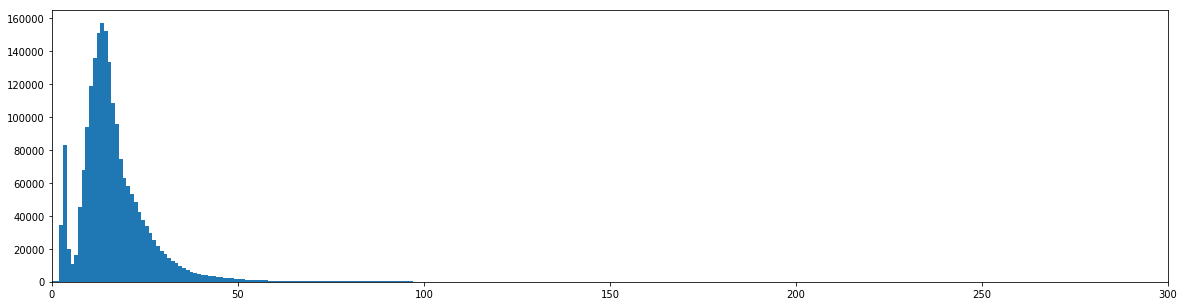

In [31]:
# Usage
plt.figure(figsize=(20,5))
circllhist_plot(API_TOTAL)
plt.xlim(0,300)

## Histogram Statistics

1. Compute mean, median, q(1,...,99), and IQR for the histogram `API_TOTAL` using the provided methods.

2. Generate a dataset of 10K random numbers D, and insert them into a histogram H
   - calculate  mean, median, IQR on D using numpy
   - calculate  mean, median, IQR on H using Circllhist
   - Compare performance with (%timeit) and percision.
   - Repeat with datasets of size 10,100K,1M

3. (*) Compute stddev, mad as follows:
   - Method 1: Replace each bucket/count pair by cont points with value bucket.midpoint()
   - Method 2: Replace each bucket/count pair by a number of points distributed evenly within the bucket
     ```
     count = 3
     bucket = [.x..x..x.]
     
     count = 5
     bucket = [.x..x..x..x..x.]
     ```

# Resampling

1. Write a function `sample(H)` that returns a random value as follows:
   - draw a random number q between 0,1 using `np.random.uniform()`
   - return H.quantile(q)

2. Write a second function sample2(H) that returns random samples from a Histogram as follows:
   - np.random.choice(p=..) to choose random bins from the histogram, so that the probability of choosing a bin is proportional to it's count.
   - Return a random element of the choosen bin using np.random.uniform(a,b)

3. Compare both `sample()` functions. Do they generate the same distribution?

4. Sample 10,100,1000,H.count() samples from the API_LATENCY_TOTAL histogram.
   - Plot a histogram of the sampled data with plt.hist()
   - Compare the plots to a visualization of circll_plot(H)

# Mergability

- Compute mean and median for each of the histograms in API_LATENCY (1M time window)
- Compute the average mean and average median over the 1week time period
- Compare the averaged mean and median to the mean and median of the merged histogram API_LATENCY_TOTAL (1W time window)

- How can we get accurate mean total mean value from the 1M mean values?